# Sentiment Analysis of IMDB reviews

## Setup

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('IMDB_Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
#remove to run for whole dataset
df = df.head(1000)
print(df.shape)

(1000, 2)


## Basic NLTK 

In [7]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/yasemin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yasemin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yasemin/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/yasemin/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yasemin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
example = df["review"][800]
print(example)

If you want just about everything you want to know about WWII from multiple perspectives, this DVD delivers, you WILL learn new things guaranteed, so much so that you won't need any other documentary's on the subject. Get this, watch it, learn from it. Good for school use as well. As a bonus, watch this with Tora tora tora, saving private ryan, patton, band of brothers, a bridge too far, the longest day and other WWII epics along with this to make your knowledge of WWII even more complete. Sir Laurence Oliver's voice adds to the overall atmosphere of each episode in this 26 part series. Seriously you won't find a better WWII documentary set on the subject. PERFECT 10!!!


In [8]:
# split the review into individual words
tokens = nltk.word_tokenize(example)
tokens[:10]

['If',
 'you',
 'want',
 'just',
 'about',
 'everything',
 'you',
 'want',
 'to',
 'know']

In [9]:
# add nltk tags to words
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('If', 'IN'),
 ('you', 'PRP'),
 ('want', 'VBP'),
 ('just', 'RB'),
 ('about', 'IN'),
 ('everything', 'NN'),
 ('you', 'PRP'),
 ('want', 'VBP'),
 ('to', 'TO'),
 ('know', 'VB')]

In [10]:
# identify named entities in text 
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  If/IN
  you/PRP
  want/VBP
  just/RB
  about/IN
  everything/NN
  you/PRP
  want/VBP
  to/TO
  know/VB
  about/IN
  (ORGANIZATION WWII/NNP)
  from/IN
  multiple/JJ
  perspectives/NNS
  ,/,
  this/DT
  DVD/NNP
  delivers/NNS
  ,/,
  you/PRP
  WILL/VBP
  learn/VB
  new/JJ
  things/NNS
  guaranteed/VBN
  ,/,
  so/RB
  much/RB
  so/IN
  that/IN
  you/PRP
  wo/MD
  n't/RB
  need/VB
  any/DT
  other/JJ
  documentary/NN
  's/POS
  on/IN
  the/DT
  subject/NN
  ./.
  Get/VB
  this/DT
  ,/,
  watch/VB
  it/PRP
  ,/,
  learn/VBZ
  from/IN
  it/PRP
  ./.
  Good/JJ
  for/IN
  school/NN
  use/NN
  as/IN
  well/RB
  ./.
  As/IN
  a/DT
  bonus/NN
  ,/,
  watch/VB
  this/DT
  with/IN
  (PERSON Tora/NNP)
  tora/NN
  tora/NN
  ,/,
  saving/VBG
  private/JJ
  ryan/NN
  ,/,
  patton/NN
  ,/,
  band/NN
  of/IN
  brothers/NNS
  ,/,
  a/DT
  bridge/NN
  too/RB
  far/RB
  ,/,
  the/DT
  longest/JJS
  day/NN
  and/CC
  other/JJ
  (ORGANIZATION WWII/NNP)
  epics/NNS
  along/IN
  with/IN
  this/DT
  to/TO
 

## VADER Sentiment Scoring

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [12]:
# the compound score will later be used to determine the accuracy of the model 
sia.polarity_scores(example)

{'neg': 0.032, 'neu': 0.842, 'pos': 0.127, 'compound': 0.9063}

In [15]:
# Run the polarity score on the entire dataset
result = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    result[i] = sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [20]:
# convert results to df
vaders = pd.DataFrame(result).T

# merge scores with df
vaders = vaders.merge(df, how='left', left_index=True, right_index=True)
vaders.head()

,neg,neu,pos,compound,review,sentiment
0,0.203,0.748,0.048,-0.9951,One of the other reviewers has mentioned that ...,positive
1,0.053,0.776,0.172,0.9641,A wonderful little production. <br /><br />The...,positive
2,0.094,0.714,0.192,0.9605,I thought this was a wonderful way to spend ti...,positive
3,0.138,0.797,0.065,-0.9213,Basically there's a family where a little boy ...,negative
4,0.052,0.801,0.147,0.9744,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Plot VADER results

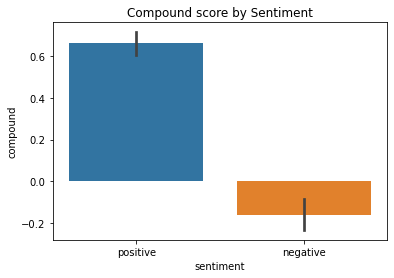

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('Compound score by Sentiment')
plt.show()

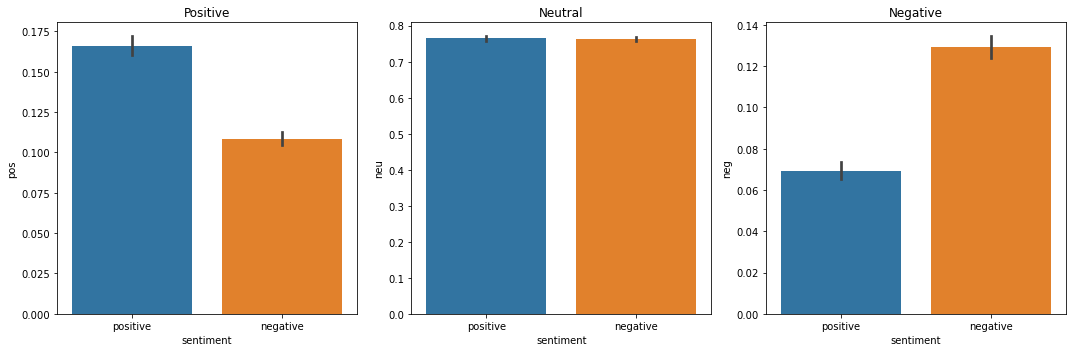

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data=vaders, x='sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## RoBERTa sentiment Analysis 